<a href="https://colab.research.google.com/github/lauraemmanuella/DataScience/blob/main/4_AnaliseExplicita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Acesso ao Drive

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/DataScience

/content/drive/MyDrive/Colab Notebooks/DataScience


# Bibliotecas

In [4]:
#Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Carrega dataset

In [ ]:
#cria dataframe com dados coletados no site SKOOB
dfSkoob = pd.read_csv('https://raw.githubusercontent.com/lauraemmanuella/DataScience/main/dados.csv')

# Análise Explícita do Dataset

Análises explícitas são técnicas simples que **destacam informações no dataset**

A diferença da análise explícita para a análise exploratória é que nesta o objetivo é conhecer os dados, já na explícita **o objetivo é resumir os dados, indicando possíveis insights**

Algumas técnicas usadas são:
* Junções de datasets
* Seleções condicionais
* Agrupamento (resumos)
* Agregações

## Mesclar, concatenar e juntar

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Concatenar

O método concat, concatena os dados (acrescenta linhas) usando os rótulos das colunas como parâmetro unificador, ou seja, espera-se que **os vários dataframes possuam as mesmas colunas**

Caso os rótulos das colunas não sejam iguais, ele vai gerar novas colunas e colocar NaN nos espaços novos criados

Pode concatenar os dados acrescentando colunas, ou seja, usando os indices das linhas como parâmetro unificador, mas nesse caso deve-se colocar o argumento axis=1

**Na concatenação, os dados não são sobrepostos, apenas adicionados**

In [ ]:
df_1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])

df_2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[4, 5, 6, 7]) 

df_3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[8, 9, 10, 11])

In [ ]:
result = pd.concat([df_1, df_2, df_3])

In [ ]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


**Se os índices forem default, podemos criar uma chave para cada dataframe quando concatenamos**

In [ ]:
df_1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

df_2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']}) 

df_3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']})
result = pd.concat([df_1, df_2, df_3])
print(result)

     A    B    C    D
0   A0   B0   C0   D0
1   A1   B1   C1   D1
2   A2   B2   C2   D2
3   A3   B3   C3   D3
0   A4   B4   C4   D4
1   A5   B5   C5   D5
2   A6   B6   C6   D6
3   A7   B7   C7   D7
0   A8   B8   C8   D8
1   A9   B9   C9   D9
2  A10  B10  C10  D10
3  A11  B11  C11  D11


In [ ]:
result = pd.concat([df_1, df_2, df_3], keys=['k1', 'k2', 'k3'])
print(result)

        A    B    C    D
k1 0   A0   B0   C0   D0
   1   A1   B1   C1   D1
   2   A2   B2   C2   D2
   3   A3   B3   C3   D3
k2 0   A4   B4   C4   D4
   1   A5   B5   C5   D5
   2   A6   B6   C6   D6
   3   A7   B7   C7   D7
k3 0   A8   B8   C8   D8
   1   A9   B9   C9   D9
   2  A10  B10  C10  D10
   3  A11  B11  C11  D11


In [ ]:
result = pd.concat([df_1, df_2, df_3], keys=['k1', 'k2', 'k3'], names = ['Grupo'])
print(result)

           A    B    C    D
Grupo                      
k1    0   A0   B0   C0   D0
      1   A1   B1   C1   D1
      2   A2   B2   C2   D2
      3   A3   B3   C3   D3
k2    0   A4   B4   C4   D4
      1   A5   B5   C5   D5
      2   A6   B6   C6   D6
      3   A7   B7   C7   D7
k3    0   A8   B8   C8   D8
      1   A9   B9   C9   D9
      2  A10  B10  C10  D10
      3  A11  B11  C11  D11


In [ ]:
result.loc['k1']

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [ ]:
result.loc['k1', 'A']

0    A0
1    A1
2    A2
3    A3
Name: A, dtype: object

In [ ]:
result.loc['k1'].loc[0, 'A']

'A0'

In [ ]:
# se axis = 1, concatena as colunas (usando os indices em comum das linhas)
pd.concat([df_1, df_2, df_3], axis=1) 

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


### Mesclar

Permite combinar os dados, sem repetir as colunas/linhas iguais

In [ ]:
esquerda = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
direita = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
esquerda

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [ ]:
direita

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [ ]:
pd.concat([esquerda, direita])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,NaN,NaN
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,NaN,NaN
3,K2,K1,A3,B3,NaN,NaN
0,K0,K0,NaN,NaN,C0,D0
1,K1,K0,NaN,NaN,C1,D1
2,K1,K0,NaN,NaN,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [ ]:
pd.merge(esquerda, direita) # mescla os dados com base nos rotulos das colunas em comum

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


Por padrão, o argumento on são os rótulos iguais das colunas e o argumento how é inner, ou seja, interseção, apenas as chaves iguais aparecerão

In [ ]:
pd.merge(esquerda, direita, how='outer', on=['key1', 'key2']) #une tudo

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [ ]:
pd.merge(esquerda, direita, how='left', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [ ]:
pd.merge(esquerda, direita, how='right', on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


### Join

O alinhamento de dados aqui está nos índices (rótulos de linha). Esse mesmo comportamento pode ser alcançado usando merge mais argumentos adicionais instruindo-o a usar os índices.

Ou seja, faz o mesmo que o merge, mas usando os indices das linhas como parametro de sobreposição

In [ ]:
esquerda = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

direita = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [ ]:
esquerda

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [ ]:
direita

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [ ]:
esquerda.join(direita)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
esquerda.join(direita, how='inner') #interseção

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [ ]:
esquerda.join(direita, how='outer') #união

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [ ]:
direita.join(esquerda)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


Observe que na concatenação não há sobreposição de dados, ou seja, nenhuma coluna ou linha é omitida, todas serão apresentadas

No Merge e Join existe uma sobreposição de dados, onde as colunas/linhas repetidas só aparecem uma vez

O merge faz o que o join faz, desde que seja configurado. Por padrão, o merge faz a sobreposição dos dados usando rótulos das colunas como chave. Já o Join faz a sobreposição dos dados usando os índices das linhas como chave.

inner = interseção
outer = união

## Groupby

O método groupby permite agrupar linhas de dados em conjunto e chamar funções agregadas

Ver mais: https://medium.com/data-hackers/8-coisas-que-voc%C3%AA-n%C3%A3o-sabia-sobre-o-pandas-groupby-b2c9033d7034

In [1]:
data = {'Empresa':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Nome':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Venda':[200,120,340,124,243,350],
        'Salario': [1500, 2000, 1800, 4000,2500, 3600]}

In [ ]:
type(data)

dict

In [5]:
dfdata = pd.DataFrame(data)

In [ ]:
dfdata

,Empresa,Nome,Venda,Salario
0,GOOG,Sam,200,1500
1,GOOG,Charlie,120,2000
2,MSFT,Amy,340,1800
3,MSFT,Vanessa,124,4000
4,FB,Carl,243,2500
5,FB,Sarah,350,3600


In [6]:
por_companhia = dfdata.groupby('Empresa')

In [ ]:
por_companhia.mean() # média de cada coluna

,Venda,Salario
Empresa,,
FB,296.5,3050.0
GOOG,160.0,1750.0
MSFT,232.0,2900.0


In [ ]:
por_companhia.max() # máximo de cada coluna

,Nome,Venda,Salario
Empresa,,,
FB,Sarah,350,3600
GOOG,Sam,200,2000
MSFT,Vanessa,340,4000


In [8]:
por_companhia.max().drop(columns = ['Nome'])

,Venda,Salario
Empresa,,
FB,350,3600
GOOG,200,2000
MSFT,340,4000


In [ ]:
por_companhia.count()

,Nome,Venda,Salario
Empresa,,,
FB,2,2,2
GOOG,2,2,2
MSFT,2,2,2


In [ ]:
por_companhia.describe()

Venda                            ... Salario                        
        count   mean         std    min  ...     25%     50%     75%     max
Empresa                                  ...                                
FB        2.0  296.5   75.660426  243.0  ...  2775.0  3050.0  3325.0  3600.0
GOOG      2.0  160.0   56.568542  120.0  ...  1625.0  1750.0  1875.0  2000.0
MSFT      2.0  232.0  152.735065  124.0  ...  2350.0  2900.0  3450.0  4000.0

[3 rows x 16 columns]

In [ ]:
por_companhia.describe().transpose()

Empresa                 FB         GOOG         MSFT
Venda   count     2.000000     2.000000     2.000000
        mean    296.500000   160.000000   232.000000
        std      75.660426    56.568542   152.735065
        min     243.000000   120.000000   124.000000
        25%     269.750000   140.000000   178.000000
        50%     296.500000   160.000000   232.000000
        75%     323.250000   180.000000   286.000000
        max     350.000000   200.000000   340.000000
Salario count     2.000000     2.000000     2.000000
        mean   3050.000000  1750.000000  2900.000000
        std     777.817459   353.553391  1555.634919
        min    2500.000000  1500.000000  1800.000000
        25%    2775.000000  1625.000000  2350.000000
        50%    3050.000000  1750.000000  2900.000000
        75%    3325.000000  1875.000000  3450.000000
        max    3600.000000  2000.000000  4000.000000

In [16]:
#Mostra a quantidade de grupos
por_companhia.ngroups

3

In [15]:
#Mostra a quantidade de amostras de cada grupo
por_companhia.size()

Empresa
FB      2
GOOG    2
MSFT    2
dtype: int64

###Manipulando os grupos

In [13]:
#Retorna os grupos em formato de dicionário
por_companhia.groups

{'FB': [4, 5], 'GOOG': [0, 1], 'MSFT': [2, 3]}

In [ ]:
#Retorna as keys dos grupos
por_companhia.groups.keys()

dict_keys(['FB', 'GOOG', 'MSFT'])

In [12]:
#Retorna os itens em cada grupo
por_companhia.groups.items()

dict_items([('FB', Int64Index([4, 5], dtype='int64')), ('GOOG', Int64Index([0, 1], dtype='int64')), ('MSFT', Int64Index([2, 3], dtype='int64'))])

In [ ]:
#Retorna um grupo específico (passe a key como argumento) em formato Dataframe
por_companhia.get_group('FB')

,Empresa,Nome,Venda,Salario
4,FB,Carl,243,2500
5,FB,Sarah,350,3600


In [ ]:
#Percorre os grupos no formato DataFrame
for i in por_companhia.groups.keys():
  df = por_companhia.get_group(i) #df é um dataframe
  print(df)

  Empresa   Nome  Venda  Salario
4      FB   Carl    243     2500
5      FB  Sarah    350     3600
  Empresa     Nome  Venda  Salario
0    GOOG      Sam    200     1500
1    GOOG  Charlie    120     2000
  Empresa     Nome  Venda  Salario
2    MSFT      Amy    340     1800
3    MSFT  Vanessa    124     4000


###Agregações

A função agg permite executar funções sobre os dados agrupados, como média, mínimo e máximo, por exemplo

In [17]:
agregado = por_companhia.agg(['mean', 'count', 'min', 'max'])

In [ ]:
agregado #Dataframe com resumo

Venda                 Salario                  
          mean count  min  max    mean count   min   max
Empresa                                                 
FB       296.5     2  243  350    3050     2  2500  3600
GOOG     160.0     2  120  200    1750     2  1500  2000
MSFT     232.0     2  124  340    2900     2  1800  4000

In [18]:
agregado.columns.ravel()

array([('Venda', 'mean'), ('Venda', 'count'), ('Venda', 'min'),
       ('Venda', 'max'), ('Salario', 'mean'), ('Salario', 'count'),
       ('Salario', 'min'), ('Salario', 'max')], dtype=object)

In [ ]:
agregado.columns = [''.join(x) for x in agregado.columns.ravel()] #alterando nomes das colunas

In [ ]:
agregado

,Vendamean,Vendacount,Vendamin,Vendamax,Salariomean,Salariocount,Salariomin,Salariomax
Empresa,,,,,,,,
FB,296.5,2,243,350,3050,2,2500,3600
GOOG,160.0,2,120,200,1750,2,1500,2000
MSFT,232.0,2,124,340,2900,2,1800,4000


In [24]:
#Calcula agregações distintas em cada coluna
agregado2 = por_companhia.agg({'Nome':'count', 
                           'Venda':'sum',
                           'Salario':'mean'})
agregado2.columns = ['Qtd_Funcionarios', 'Total_Vendas', 'Media_Salarial']

In [25]:
agregado2

,Qtd_Funcionarios,Total_Vendas,Media_Salarial
Empresa,,,
FB,2,593,3050
GOOG,2,320,1750
MSFT,2,464,2900


### Plotando grupos

Empresa
FB      AxesSubplot(0.125,0.125;0.775x0.755)
GOOG    AxesSubplot(0.125,0.125;0.775x0.755)
MSFT    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

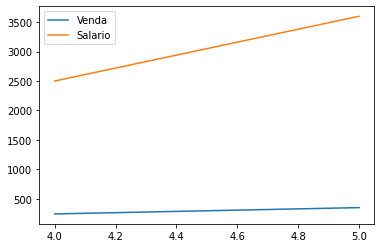

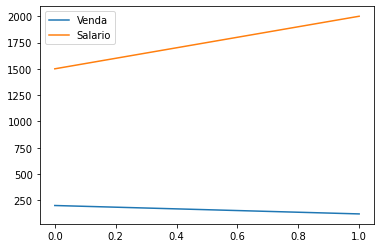

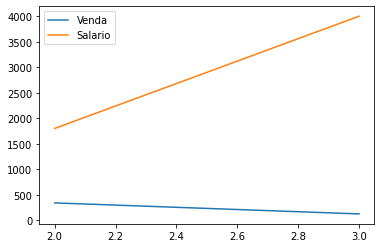

In [27]:
por_companhia.plot()

## Seleção condicional


Uma característica importante dos pandas é a seleção condicional usando notação de colchetes, muito semelhante ao numpy:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lauraemmanuella/DataScience/main/BaseAlunos.csv')

In [ ]:
df

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.
0,2020001,ANA SILVA,10.0,4.0,2.0,8.00,7.3,7.0,APR
1,2020002,BRUNO SOUZA,7.0,1.0,4.0,4.00,5.0,1.0,APR
2,2020003,CARLA OLIVEIRA,7.0,0.0,2.0,3.00,4.0,11.0,REP
3,2020004,DAVID ANDRADE,3.0,0.0,5.0,4.00,4.0,17.0,REP
4,2020005,EVELIN MATIAS,8.0,10.0,2.0,4.00,7.3,11.0,APR
5,2020006,FRANCISCO JOSÉ,3.0,8.0,6.0,-,5.7,17.0,APRN
6,2020007,GABRIEL SOARES,10.0,6.0,6.0,-,7.3,0.0,APR
7,2020008,HEITOR NEVES,3.0,10.0,9.0,-,7.3,15.0,APR
8,2020009,INGRID DA SILVA,0.0,5.0,2.0,0.00,2.3,20.0,REMF
9,2020010,JOSÉ MARIA SANTOS,9.0,2.0,0.0,2.00,4.3,17.0,REP


In [ ]:
#Mostrar somente os alunos aprovados
df[df['Sit.'] == 'APR']

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.
0,2020001,ANA SILVA,10.0,4.0,2.0,8.00,7.3,7.0,APR
1,2020002,BRUNO SOUZA,7.0,1.0,4.0,4.00,5.0,1.0,APR
4,2020005,EVELIN MATIAS,8.0,10.0,2.0,4.00,7.3,11.0,APR
6,2020007,GABRIEL SOARES,10.0,6.0,6.0,-,7.3,0.0,APR
7,2020008,HEITOR NEVES,3.0,10.0,9.0,-,7.3,15.0,APR


In [ ]:
#Observe que a seleção condicional faz o mesmo que um Filter faz
df['Sit.'] == 'APR'  #condição do filtro

0     True
1     True
2    False
3    False
4     True
5    False
6     True
7     True
8    False
9    False
Name: Sit., dtype: bool

Para mais de uma condição usa-se & e | com parênteses

In [ ]:
#mostrar quem foi reprovado
df[(df['Sit.'] == 'REP') | (df['Sit.'] == 'REMF')]

,Matrícula,Nome,Unid. 1,Unid. 2,Unid. 3,Rec.,Resultado,Faltas,Sit.
2,2020003,CARLA OLIVEIRA,7.0,0.0,2.0,3.00,4.0,11.0,REP
3,2020004,DAVID ANDRADE,3.0,0.0,5.0,4.00,4.0,17.0,REP
8,2020009,INGRID DA SILVA,0.0,5.0,2.0,0.00,2.3,20.0,REMF
9,2020010,JOSÉ MARIA SANTOS,9.0,2.0,0.0,2.00,4.3,17.0,REP


In [ ]:
#mostrar as faltas de quem foi reprovado
df[(df['Sit.'] == 'REP') | (df['Sit.'] == 'REMF')]['Faltas'] #encadeamento de ações

2    11.0
3    17.0
8    20.0
9    17.0
Name: Faltas, dtype: float64

In [ ]:
#mostrar as faltas e resultados de quem foi reprovado
df[(df['Sit.'] == 'REP') | (df['Sit.'] == 'REMF')][['Resultado','Faltas']]

,Resultado,Faltas
2,4.0,11.0
3,4.0,17.0
8,2.3,20.0
9,4.3,17.0


In [ ]:
#mostrar as faltas de quem foi aprovado
df[(df['Sit.'] == 'APR') | (df['Sit.'] == 'APRN')]['Faltas']

0     7.0
1     1.0
4    11.0
5    17.0
6     0.0
7    15.0
Name: Faltas, dtype: float64

In [ ]:
#VERIFICAR A MEDIA DAS FALTAS DE QUEM FOI REPROVADO E DE QUEM FOI APROVADO
mediafaltasrep = df[(df['Sit.'] == 'REP') | (df['Sit.'] == 'REMF')]['Faltas'].mean()
print('Media de faltas de quem foi reprovado: ',mediafaltasrep)
mediafaltasapr = df[(df['Sit.'] == 'APR') | (df['Sit.'] == 'APRN')]['Faltas'].mean()
print('Media de faltas de quem foi aprovado: ', mediafaltasapr)

Media de faltas de quem foi reprovado:  16.25
Media de faltas de quem foi aprovado:  8.5


In [ ]:
#Verificar quem tirou mais de 7 nas 3 unidades
maiorsete = df[(df['Unid. 1']>=7) & (df['Unid. 2']>=7) & (df['Unid. 3']>=7)]
print(maiorsete)

Empty DataFrame
Columns: [Matrícula, Nome, Unid. 1, Unid. 2, Unid. 3, Rec., Resultado, Faltas, Sit.]
Index: []


**Correlação entre colunas**

In [ ]:
df['Unid. 1'].corr(df['Resultado'])  #0.5, fraca correlação positiva

0.5292484090079961

## Aplicando funções

In [ ]:
d_f = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
d_f

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [ ]:
d_f['col1'].apply(lambda x: x*2)

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [ ]:
#Se quiser alterar no d_f, precisar fazer a atribuição
d_f['col1'] = d_f['col1'].apply(lambda x: x*2)

In [ ]:
d_f['col3'] = d_f['col3'].apply(len)

In [ ]:
d_f

,col1,col2,col3
0,2,444,3
1,4,555,3
2,6,666,3
3,8,444,3


In [ ]:
d_f['col1'].sum()

20

In [ ]:
#ORDENANDO DATAFRAME
d_f.sort_values(by='col2', ascending=False) #inplace=False por padrão

,col1,col2,col3
2,6,666,3
1,4,555,3
0,2,444,3
3,8,444,3


**Encontre Valores Nulos ou Verifique Valores Nulos**

In [ ]:
d_f.isnull()

,col1,col2,col3
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False


## Dados ausentes

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

In [ ]:
#np.nan gera uma marcação de dado ausente
dfna = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [ ]:
dfna

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [ ]:
dfna.dropna() # mostra as linhas que nao tem dados ausentes

,A,B,C
0,1.0,5.0,1


In [ ]:
dfna.dropna(axis=1) #mostra as colunas que nao tem dados ausentes

,C
0,1
1,2
2,3


In [ ]:
dfna.dropna(thresh=2) #thresh define o mínimo de elementos não NaN

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [ ]:
dfna.fillna(value='-') #preenche os dados ausentes com um value

,A,B,C
0,1,5,1
1,2,-,2
2,-,-,3


In [ ]:
# veja que nem o dropna nem o fillna alteram de fato o dataframe original, eles apenas retornam uma copia alterada
dfna 

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


**Para alterar na origem deve colocar o argumento inplace**

In [ ]:
dfna['A'].fillna(value=dfna['A'].mean(), inplace = True) #preenche com a media da coluna

In [ ]:
dfna

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,1.5,NaN,3
